In [ ]:
! pip install keras
! pip install sklearn

In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

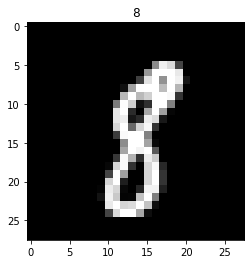

In [5]:
plt.imshow(x_train[300], cmap='gray')
plt.title(y_train[300])
plt.show()

In [8]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [9]:
# Creating model
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=4, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=4, kernel_size=(7,7), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 4)         104       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 4)           788       
_________________________________________________________________
average_pooling2d_1 (Average (None, 3, 3, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
____________________________________________________

In [14]:
model.fit(x_train, y_train, epochs=1, batch_size=1)

60000/60000 [==============================] - 71s 1ms/step - loss: 0.3155 - acc: 0.9090


In [15]:
import cv2

In [16]:
img = cv2.imread('images\\image-3.png')

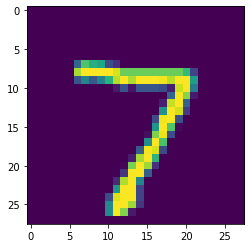

In [17]:
plt.imshow(x_test[0])

In [19]:
test = x_test[0].reshape(-1, 28, 28, 1)
test.shape

(1, 28, 28, 1)

In [25]:
predict_x = model.predict(test)
classes_x = np.argmax(predict_x, axis=1)
print(classes_x)

[7]


In [26]:
test2 = x_test[78].reshape(-1, 28, 28, 1)
predict_x2 = model.predict(test2)
classes_x2 = np.argmax(predict_x2, axis=1)
print(classes_x2)

[9]


In [27]:
model.save('my_model.h5')